In [ ]:
pip install seaborn pandas matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

exp_json = "./experiment-20260213.json"

methods = ["bruteforce", "dfs", "hillclimb", "buildingwalk"]

df = pd.read_json(exp_json)
df.to_pickle("experiment.pickle")
df.to_csv("experiment-20260211.csv")
#print("Experiment:")
#print(df)

In [2]:
#df[(df["dist_weight"] == 0.0) and (df["radius"] == 50)]
df[(df["dist_weight"] == 1.0) & (df["radius"] == 50) & (df["method"] == "buildingwalk")].best_score.mean()

np.float64(1.720644744130573)

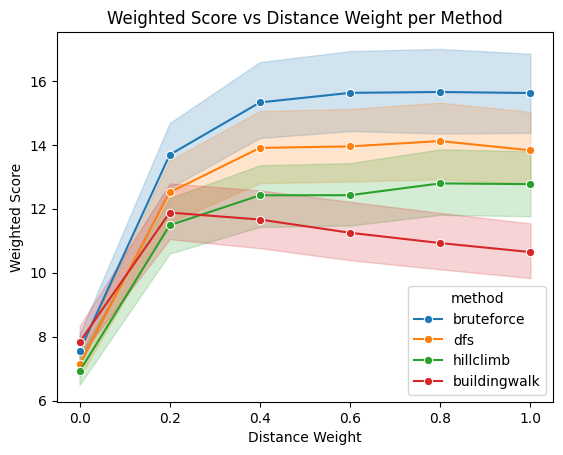

In [3]:
plt.figure()

sns.lineplot(
    data=df,
    x="dist_weight",
    y="weighted_score",
    hue="method",
    hue_order=methods,
    marker="o"
)

plt.xlabel("Distance Weight")
plt.ylabel("Weighted Score")
plt.title("Weighted Score vs Distance Weight per Method")
plt.show()

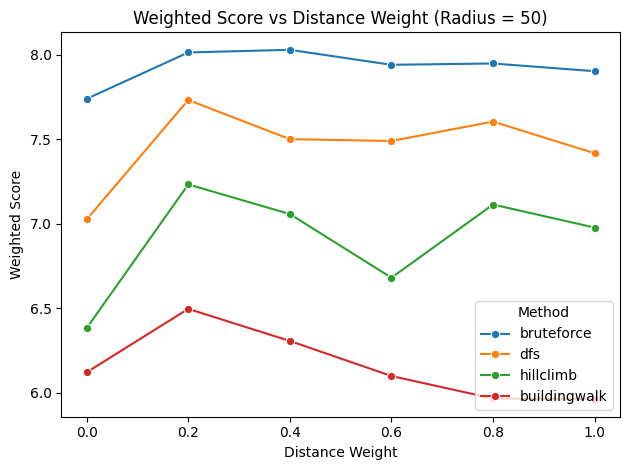

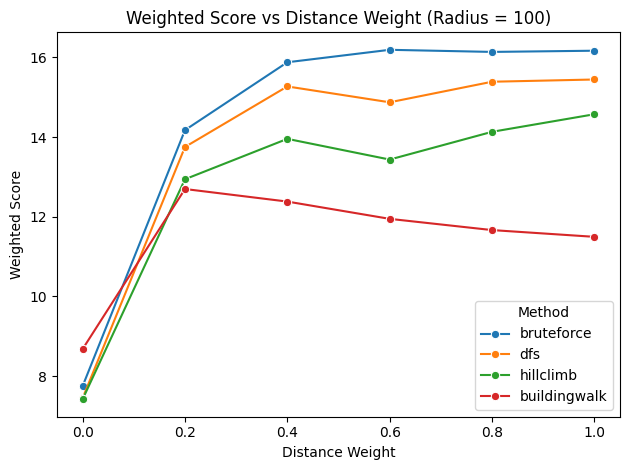

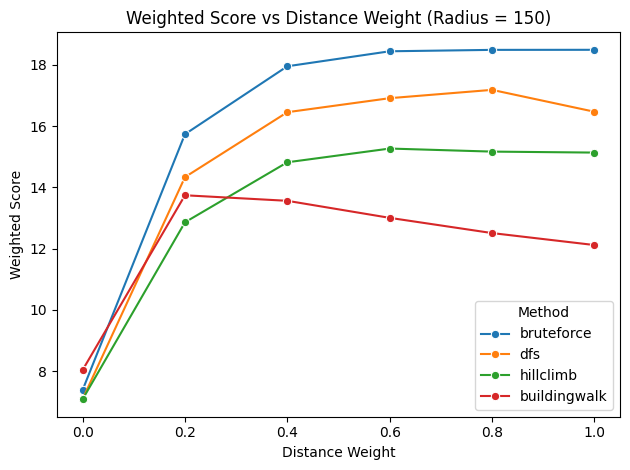

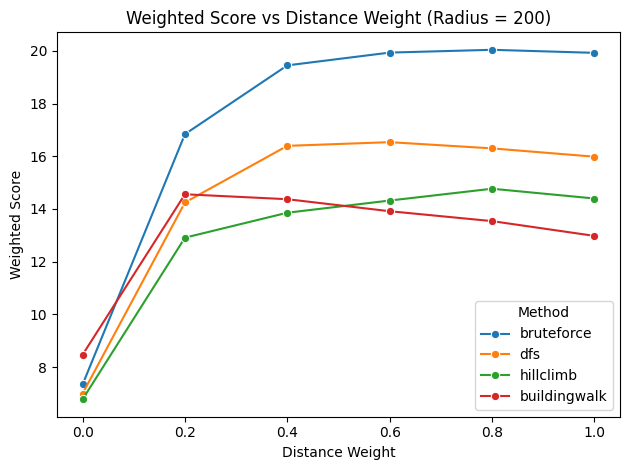

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

radii = sorted(df["radius"].unique())

for r in radii:
    plt.figure()
    
    subset = df[df["radius"] == r].sort_values(["method", "dist_weight"])
    
    sns.lineplot(
        data=subset,
        x="dist_weight",
        y="weighted_score",
        hue="method",
        hue_order=methods,
        marker="o",
        errorbar=None  
    )

    plt.xlabel("Distance Weight")
    plt.ylabel("Weighted Score")
    plt.title(f"Weighted Score vs Distance Weight (Radius = {r})")
    plt.legend(title="Method")
    plt.tight_layout()
    plt.show()


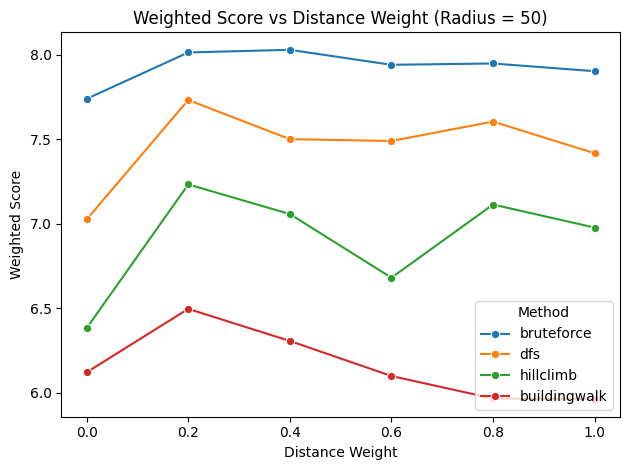

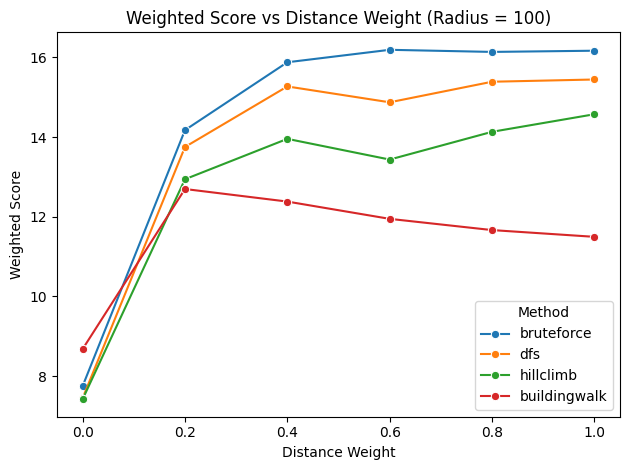

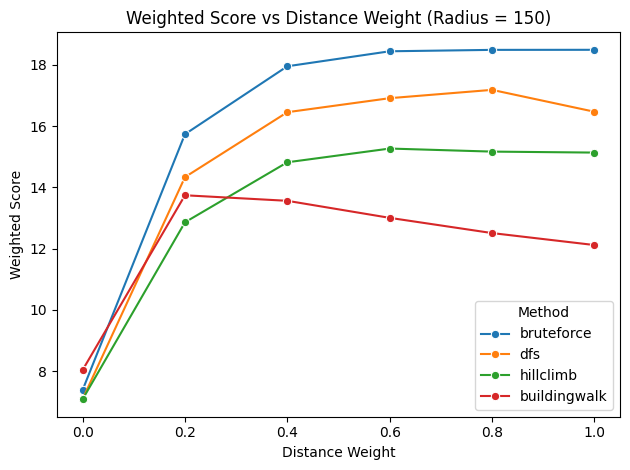

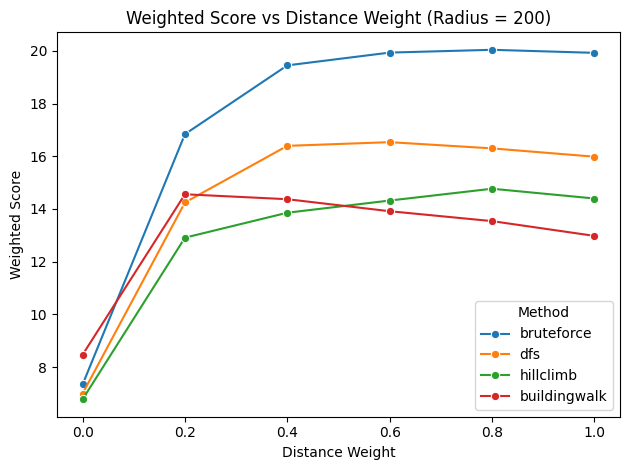

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import os 

radii = sorted(df["radius"].unique())

for r in radii:
    plt.figure()
    
    subset = df[df["radius"] == r].sort_values(["method", "dist_weight"])
    
    sns.lineplot(
        data=subset,
        x="dist_weight",
        y="weighted_score",
        hue="method",
        hue_order=methods,
        marker="o",
        errorbar=None  
    )

    plt.xlabel("Distance Weight")
    plt.ylabel("Weighted Score")
    plt.title(f"Weighted Score vs Distance Weight (Radius = {r})")
    plt.legend(title="Method")
    plt.tight_layout()
    plt.savefig(os.path.join(f"{int(r)}.png"), dpi=300)
    plt.show()


In [6]:
#df[df["dist_weight"] == 1].groupby("method")["weighted_score"].mean()
# df[df["dist_weight"] == 0] \
#     .groupby(["radius", "method"])["weighted_score"] \
#     .mean() \
#     .sort_index()


# (
#     df[df["dist_weight"] == 1]
#       .groupby(["method", "radius"])["weighted_score"]
#       .mean()
#       .unstack("radius")
#       .round(2)
# )

methods_subset = ["bruteforce", "buildingwalk"]
radii_subset = [50, 200]

subset = df[
    (df["method"].isin(methods_subset)) &
    (df["radius"].isin(radii_subset))
]

# Group and aggregate
table = (
    subset.groupby(["radius", "dist_weight", "method"])
          .agg(
              mean_total_crimes=("total_crimes", "mean"),
              mean_seen_crimes=("seen_crimes", "mean")
          )
          .round(2)
          .reset_index()
          .sort_values(["radius", "dist_weight", "method"])
)

print(table)

    radius  dist_weight        method  mean_total_crimes  mean_seen_crimes
0       50          0.0    bruteforce              52.49             24.27
1       50          0.0  buildingwalk              52.49             17.89
2       50          0.2    bruteforce              52.49             20.68
3       50          0.2  buildingwalk              52.49             15.50
4       50          0.4    bruteforce              52.49             19.81
5       50          0.4  buildingwalk              52.49             14.88
6       50          0.6    bruteforce              52.49             19.37
7       50          0.6  buildingwalk              52.49             14.02
8       50          0.8    bruteforce              52.49             19.36
9       50          0.8  buildingwalk              52.49             13.77
10      50          1.0    bruteforce              52.49             19.29
11      50          1.0  buildingwalk              52.49             13.77
12     200          0.0  

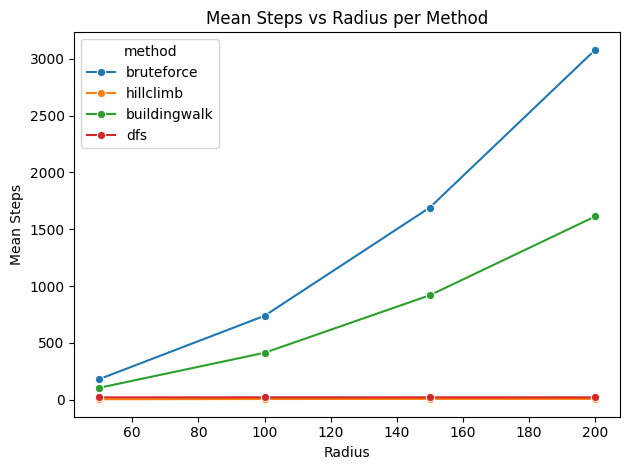

In [7]:
# Check mean steps by radius
plt.figure()

sns.lineplot(
    data=df,
    x="radius",
    y="steps",
    hue="method",
    estimator="mean",   
    errorbar=None,      
    marker="o"
)

plt.xlabel("Radius")
plt.ylabel("Mean Steps")
plt.title("Mean Steps vs Radius per Method")
plt.tight_layout()
plt.show()

In [34]:
# Check mean total_distance by radius
# Buil


# plt.figure()

# sns.lineplot(
#     data=df,
#     x="radius",
#     y="total_distance",
#     hue="method",
#     estimator="mean",   
#     errorbar=None,      
#     marker="o"
# )

# plt.xlabel("Radius")
# plt.ylabel("Mean Steps")
# plt.title("Mean Steps vs Radius per Method")
# plt.tight_layout()
# plt.show()


# I think this works to see why building walk is "better" when distance does not matter. 
# Building walk catches more crimes in relation to the shorter distance
# When dist_weight is 0, Bruteforce gets the higher score with higher radius.
# When radius is 50, Bruteforce gets the higher score because buildingwalk can not reach that many crimes.
# When radius is higher, Buildingwalk can reach the "high crime" locations and gets the higher score.
# Many crimes are registered close to buildings, scattered crime locations has fewer crimes.

# currentCam.weighted_score = weight_score > 0 ? gridScore / weight_score : 0
# If the distance does not matter, the weight_score is equal to the amount of crime locations found. 
# The fewer crime locations found, the lower value is used when dividing the grid_score and produces a higher result.
# I guess buildingwalk finds more higher crime locations and fewer low crime locations than bruteforce.

filtered_df = df[
    (df["method"].isin(["buildingwalk", "bruteforce"])) &
    (df["dist_weight"] == 0.0)
]
#"area",
#"best_score"
mean_df = (
    filtered_df.groupby(["radius", "method"])[["total_distance", "seen_crimes", "pai", "weighted_score"]]
      .mean()
      .reset_index()
)

mean_df["temp_score"] = (
    mean_df["seen_crimes"] / mean_df["total_distance"]
)

mean_df

,radius,method,total_distance,seen_crimes,pai,weighted_score,temp_score
0,50,bruteforce,84.946668,24.266667,5.766517,7.738664,0.285669
1,50,buildingwalk,68.978155,17.893333,6.123985,6.120916,0.259406
2,100,bruteforce,343.987627,49.280000,7.139941,7.750047,0.143261
3,100,buildingwalk,274.762718,44.300000,8.206588,8.680209,0.161230
4,150,bruteforce,717.328412,67.500000,7.170052,7.386390,0.094099
5,150,buildingwalk,588.074656,60.663333,8.470659,8.037516,0.103156
6,200,bruteforce,1021.284278,79.510000,7.195613,7.339416,0.077853
7,200,buildingwalk,791.363020,72.246667,9.091312,8.467379,0.091294
